In [2]:
# Import our dependencies
# Conflict 1
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Create a logistic regression classifier. 
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE

import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
def preprocessFile(filename = Path('../Data/AdultCensusUpdated.csv')):
    
    print(f'Preprocessing file {filename}')
    dtype_mapper = {'age': 'int64',
                    'workclass': 'string',
                    'fnlwgt': 'int64',
                    'education': 'string',
                    'education.num': 'int64',
                    'marital.status': 'string',
                    'occupation': 'string',
                    'relationship': 'string',
                    'race': 'string',
                    'sex': 'string',
                    'capital.gain': 'int64',
                    'capital.loss': 'int64',
                    'hours.per.week': 'int64',
                    'native.country': 'string',
                    'income': 'string',
                    'State': 'string'}
    df = pd.read_csv(filename, dtype=dtype_mapper, na_values='?')    
    df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'state']
    df = df.drop(['fnlwgt',
                  'education', 
                #   'state',
                  'capital_gain', 
                  'capital_loss',
                  'native_country'], axis=1)
    df = df.dropna()
    return df

census_df = preprocessFile()
census_df.sample(10)


Preprocessing file ..\Data\AdultCensusUpdated.csv


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,state
16066,27,Private,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,30,<=50K,Virginia
3644,44,Self-emp-not-inc,9,Married-civ-spouse,Craft-repair,Husband,White,Male,50,<=50K,South Carolina
30858,33,Self-emp-inc,9,Married-civ-spouse,Sales,Husband,White,Male,50,>50K,Oklahoma
677,46,Private,7,Married-civ-spouse,Craft-repair,Husband,White,Male,40,>50K,Alaska
5170,30,Private,11,Married-civ-spouse,Transport-moving,Husband,White,Male,40,<=50K,Ohio
28925,40,Private,10,Never-married,Craft-repair,Own-child,Black,Male,40,<=50K,Colorado
27781,38,Private,9,Divorced,Adm-clerical,Own-child,White,Female,40,<=50K,Arkansas
22274,41,Private,10,Divorced,Tech-support,Not-in-family,White,Male,50,<=50K,Connecticut
21267,55,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,>50K,New Jersey
15452,19,Private,10,Never-married,Adm-clerical,Own-child,White,Female,20,<=50K,Illinois


### Separate the features X from the target y

In [5]:
y = census_df.income

X = census_df.copy()
X.drop('income', axis=1, inplace=True)


In [6]:
X.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,state
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,Maryland
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,Idaho
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,Florida
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,45,Florida
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,40,California


In [7]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each non-numeric column
for col in X.select_dtypes(include=["string"]).columns:
    X[col] = label_encoder.fit_transform(X[col])

X.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,state
1,82,2,9,6,3,1,4,0,18,19
3,54,2,4,0,6,4,4,0,40,11
4,41,2,10,5,9,3,4,0,40,8
5,34,2,9,0,7,4,4,0,45,8
6,38,2,6,5,0,4,4,1,40,4


### Separate the data into training and testing subsets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Scale the data using `StandardScaler`

In [9]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler =scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression Model

In [10]:
# Create a random forest classifier
lr_model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Fitting the model
rf_model = lr_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = lr_model.predict(X_test_scaled)
print(predictions)

['<=50K' '>50K' '>50K' ... '<=50K' '<=50K' '<=50K']


In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
cr_df = pd.DataFrame(report).transpose()
cr_df['model'] = 'LogisticRegression'
cr_df['model'] = cr_df['model'].astype('string')
cr_df['support'] = cr_df['support'].astype('int64')


In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5370,382
Actual 1,1138,790



Accuracy Score : 0.8020833333333334

Classification Report


,precision,recall,f1-score,support,model
<=50K,0.825138,0.933588,0.876020,5752,LogisticRegression
>50K,0.674061,0.409751,0.509677,1928,LogisticRegression
accuracy,0.802083,0.802083,0.802083,0,LogisticRegression
macro avg,0.749600,0.671670,0.692848,7680,LogisticRegression
weighted avg,0.787212,0.802083,0.784052,7680,LogisticRegression


### Export Classification Report

In [38]:
import csv

def classificationReportToPanda(report, model):
    file = f'../Data/classification_report_{model}.csv'
    df = pd.DataFrame(report).transpose()
    df['model'] = model
    df['model'] = df['model'].astype('string')
    df['support'] = df['support'].astype('int64')    
    df.to_csv(file, index_label='class', quoting=csv.QUOTE_ALL)
    display(df)

report = classification_report(y_test, predictions, output_dict=True)

classificationReportToPanda(report, 'LogisticRegression')

,precision,recall,f1-score,support,model
<=50K,0.825138,0.933588,0.876020,5752,LogisticRegression
>50K,0.674061,0.409751,0.509677,1928,LogisticRegression
accuracy,0.802083,0.802083,0.802083,0,LogisticRegression
macro avg,0.749600,0.671670,0.692848,7680,LogisticRegression
weighted avg,0.787212,0.802083,0.784052,7680,LogisticRegression


### Analyze The important features

In [15]:
# Compute coefficients and odds ratio
coefficients = lr_model.coef_[0]
odds_ratio = np.exp(coefficients)

#Display feature importances using coefficients and odds ratio
features_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratio
})
print('\nFeature Importance (Coefficent and Odds Ratio):')
features_importance_df.sort_values(by='Coefficient', ascending=False)






Feature Importance (Coefficent and Odds Ratio):


,Feature,Coefficient,Odds Ratio
2,education_num,0.922699,2.516073
0,age,0.523180,1.687385
7,sex,0.450913,1.569744
8,hours_per_week,0.349267,1.418027
6,race,0.097031,1.101894
4,occupation,-0.012303,0.987772
9,state,-0.016235,0.983897
1,workclass,-0.112426,0.893664
5,relationship,-0.205277,0.814422
3,marital_status,-0.332540,0.717100


### Graph Features by Importance

In [16]:
#Organize dataframe to create horizontal barchart

importance_df = features_importance_df.sort_values(by='Coefficient', ascending=False)
importance_df.reset_index(inplace=True, drop=True)
importance_df = importance_df.drop(columns=['Odds Ratio'])
importance_df.set_index(importance_df['Feature'], inplace=True)
importance_df = importance_df.drop(columns=['Feature'])
# importance_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importance_df.sort_values(by='Coefficient')

<Axes: title={'center': 'Features Importances'}, ylabel='Feature'>

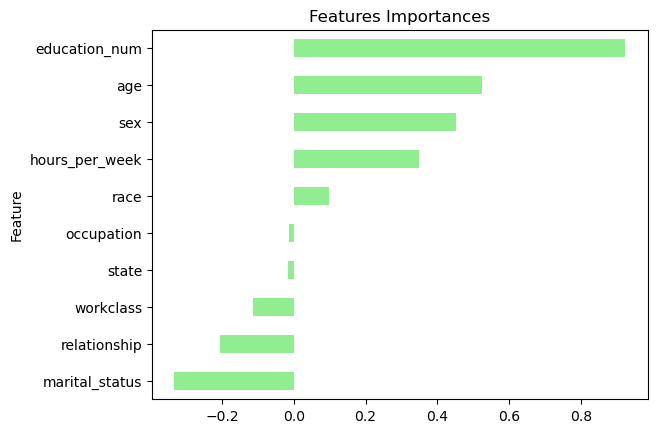

In [17]:
# Visualize the features by importance

importances_sorted.plot(
                   kind='barh', 
                   color='lightgreen', 
                   title= 'Features Importances', 
                   legend=False
                  )


### Add test results to original dataframe

In [18]:
# Adding Results to X_test dataframe
# Adding to X-Test becasue it has the same index as original dataframe

X_test['Results'] = predictions
X_test['Model'] = 'LogisticRegression'

# Drop unnecessary columns
X_test = X_test.drop(columns = ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 
            'relationship', 'race', 'sex', 'hours_per_week', 'state'])

X_test.head()


,Results,Model
3314,<=50K,LogisticRegression
19677,>50K,LogisticRegression
29448,>50K,LogisticRegression
3581,<=50K,LogisticRegression
25490,<=50K,LogisticRegression


In [19]:
# Copy original reprocess dataset
census_copy_df = census_df.copy()

#Join result data to original
census_copy_df = census_copy_df.join(X_test)
census_copy_df = census_copy_df.dropna(axis=0, how='any')
census_copy_df.head(20)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,state,Results,Model
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,<=50K,Maryland,<=50K,LogisticRegression
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,<=50K,Florida,<=50K,LogisticRegression
13,32,Private,14,Separated,Exec-managerial,Not-in-family,White,Male,55,>50K,New Hampshire,<=50K,LogisticRegression
16,45,Private,7,Divorced,Transport-moving,Not-in-family,White,Male,76,>50K,Wyoming,<=50K,LogisticRegression
22,61,Private,9,Divorced,Sales,Unmarried,White,Female,25,<=50K,New York,<=50K,LogisticRegression
26,33,Private,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,32,<=50K,Colorado,<=50K,LogisticRegression
27,49,Private,3,Married-civ-spouse,Other-service,Husband,White,Male,40,<=50K,Montana,<=50K,LogisticRegression
28,37,Self-emp-inc,6,Never-married,Transport-moving,Not-in-family,White,Male,50,>50K,Colorado,<=50K,LogisticRegression
30,23,Private,10,Separated,Other-service,Not-in-family,White,Male,40,>50K,New York,<=50K,LogisticRegression
36,53,Private,9,Never-married,Sales,Not-in-family,White,Male,48,>50K,Utah,<=50K,LogisticRegression


In [20]:
# Export
census_copy_df.to_csv('../Data/LogisticRegression.csv', index_label='index')
